<a href="https://colab.research.google.com/github/NSG0409/Colab-Python/blob/main/suicide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise do suicídio no Brasil e Itália em comparação com o mundo

O projeto consiste na utilização do Python que, após a leitura de uma base de dados relacionada ao suicídio de 1985 a 2016.

O objetivo desse projeto é a analise das taxas de suicídio ao longo dos anos, com enfase no Brasil e na Itália, em comparação com o mundo.

### Importando as libs a serem utilizadas

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
# Importando os dados e adicionando-os a um Dataframe
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/data_science/master/datasets/suicide_rates.csv", sep=",")
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [11]:
# Formato do DataFrame
print("Formato do Dataframe: ", df.shape)

# As primeiras entradas da base de dados
df.head()

Formato do Dataframe:  (27820, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [33]:
# Extraindo os dados relativos apenas ao Brasil
df_brazil = df[df.country == "Brazil"].copy()

# Extraindo os dados relativos apenas a Italia
df_italy = df[df.country == "Italy"].copy()

# Formato do novo DataFrame
print("Formato do DataFrame: ", df_brazil)

# As primeiras entradas do novo DataFrame
df_brazil.head()

Formato do DataFrame:       country  year  ... gdp_per_capita ($)       generation
4172  Brazil  1985  ...               1898  G.I. Generation
4173  Brazil  1985  ...               1898  G.I. Generation
4174  Brazil  1985  ...               1898           Silent
4175  Brazil  1985  ...               1898          Boomers
4176  Brazil  1985  ...               1898     Generation X
...      ...   ...  ...                ...              ...
4539  Brazil  2015  ...               9431       Millenials
4540  Brazil  2015  ...               9431           Silent
4541  Brazil  2015  ...               9431       Millenials
4542  Brazil  2015  ...               9431     Generation Z
4543  Brazil  2015  ...               9431     Generation Z

[372 rows x 12 columns]


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4172,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4173,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
4175,Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,"222,942,790,435",1898,Boomers
4176,Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,"222,942,790,435",1898,Generation X


In [62]:
df_italy.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
12788,Italy,1985,male,75+ years,542,1107700,48.93,Italy1985,0.738,"450,725,816,043",8329,G.I. Generation
12789,Italy,1985,male,55-74 years,1307,4991500,26.18,Italy1985,0.738,"450,725,816,043",8329,G.I. Generation
12790,Italy,1985,male,35-54 years,902,7267900,12.41,Italy1985,0.738,"450,725,816,043",8329,Silent
12791,Italy,1985,female,75+ years,239,1961500,12.18,Italy1985,0.738,"450,725,816,043",8329,G.I. Generation
12792,Italy,1985,female,55-74 years,596,6003500,9.93,Italy1985,0.738,"450,725,816,043",8329,G.I. Generation


Filtrando os dados null do resto da base de dados


In [34]:
# Dados ausentes referente a base de dados mundial
print("---" * 5,  "Mundial", "---" * 5)
display(df.isnull().sum())

print("\n", "====" * 10, "\n")

# Dados ausentes referente a base de dados brasileira
print("---" * 5,  "Brasil", "---" * 5)
display(df_brazil.isnull().sum())

print("\n", "====" * 10, "\n")

# Dados ausentes referente a base de dados italiana
print("---" * 5,  "Itália", "---" * 5)
display(df_italy.isnull().sum())

print("\n", "====" * 10, "\n")

--------------- Mundial ---------------


country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64



--------------- Brasil ---------------


country                 0
year                    0
sex                     0
age                     0
suicides_no             0
population              0
suicides/100k pop       0
country-year            0
HDI for year          252
 gdp_for_year ($)       0
gdp_per_capita ($)      0
generation              0
dtype: int64



--------------- Itália ---------------


country                 0
year                    0
sex                     0
age                     0
suicides_no             0
population              0
suicides/100k pop       0
country-year            0
HDI for year          252
 gdp_for_year ($)       0
gdp_per_capita ($)      0
generation              0
dtype: int64

# Calculo da tendência da taxa de suicídio do Brasil e da Itália em relação a global

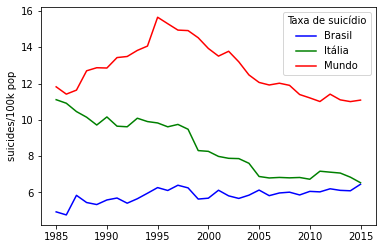

In [44]:
# Média de suicidios do Brasil
years = df_brazil.year.unique()
suicides_brazil_mean = df_brazil.groupby("year")["suicides/100k pop"].mean()

# Média de suicidios da Itália
years = df_italy.year.unique()
suicides_italy_mean = df_italy.groupby("year")["suicides/100k pop"].mean()

# Média de suicidios mundial
suicides_world_mean = df.groupby("year")["suicides/100k pop"].mean()

# Como não a dados de 2016 sobre o Brasil, será retirado a coluna referente ao mundo
suicides_world_mean.drop(2016, inplace=True)

# Comparativo Brasil X Mundo
ax = sns.lineplot(x=years, y=suicides_brazil_mean, label='Brasil', color="blue")
ax = sns.lineplot(x=years, y=suicides_italy_mean, label='Itália', color="green")
ax = sns.lineplot(x=years, y=suicides_world_mean, label='Mundo', color="red")
plt.legend(title="Taxa de suicídio")
plt.show()

# Brasil

In [47]:
# Uma tabela dinâmica referente ao Brasil
tableBrazil = pd.pivot_table(df_brazil, values='suicides_no', index=['year'], columns=['age'])

# Reordenar para ordem crescente
column_order = ["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "+75 years"]
table = table.reindex(column_order, axis=1)

# As primeiras entradas da tabela
tableBrazil.head()

age,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
year,,,,,,
1985,470.5,530.0,653.5,38.0,341.5,80.5
1986,508.0,505.5,651.0,31.0,372.0,68.0
1987,502.0,565.5,724.5,33.5,422.0,88.5
1988,472.0,557.5,724.0,30.0,356.0,93.5
1989,491.5,569.0,692.5,31.5,354.5,92.5


## Índices de suicídio por faixa etária


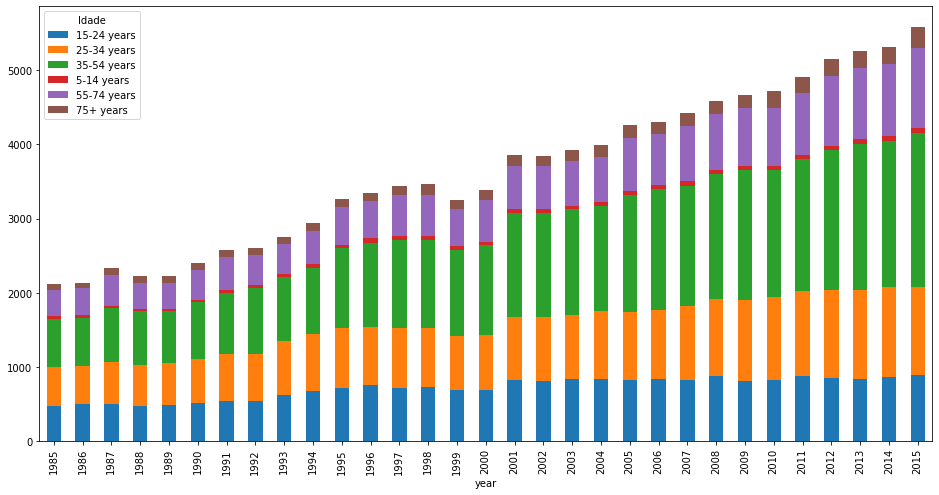

In [51]:
# Plot da pivot table das faixas etárias(Brasil)
tableBrazil.plot.bar(stacked=True, figsize=(16,8))
plt.legend(title="Idade");

In [55]:
# Estatística de suicídios por faixa etária no Brasil
tableBrazil[["25-34 years"]].loc[2015]
tableBrazil.loc[2015] / tableBrazil.loc[2015].sum()

age
15-24 years    0.159993
25-34 years    0.211681
35-54 years    0.371585
5-14 years     0.012094
55-74 years    0.194571
75+ years      0.050076
Name: 2015, dtype: float64

## Taxa de suicídio no Brasil entre homens e mulheres

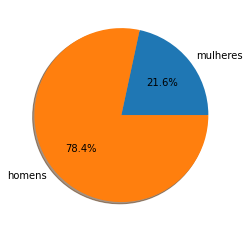

In [59]:
# Extração de valores entre homens e mulheres
men_women = df_brazil.groupby("sex").suicides_no.sum() / df_brazil.groupby("sex").suicides_no.sum().sum()

# Gráfio de pizza
plt.pie(men_women, labels=['mulheres', 'homens'], autopct='%1.1f%%', shadow=True);

## Itália

In [48]:
# Uma tabela dinâmica referente a Itália
tableItaly = pd.pivot_table(df_italy, values='suicides_no', index=['year'], columns=['age'])

# Reordenar para ordem crescente
column_order = ["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "+75 years"]
tableItaly = tableItaly.reindex(column_order, axis=1)

# As primeiras entradas da tabela
tableItaly.head()

age,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,+75 years
year,,,,,,
1985,7.5,154.5,233.5,642.0,951.5,NaN
1986,9.0,154.5,238.5,663.0,873.0,NaN
1987,7.5,154.0,262.0,608.0,821.0,NaN
1988,7.0,151.0,250.0,572.5,792.5,NaN
1989,8.5,158.0,285.5,573.5,755.0,NaN


## Índices de suicídio por faixa etária

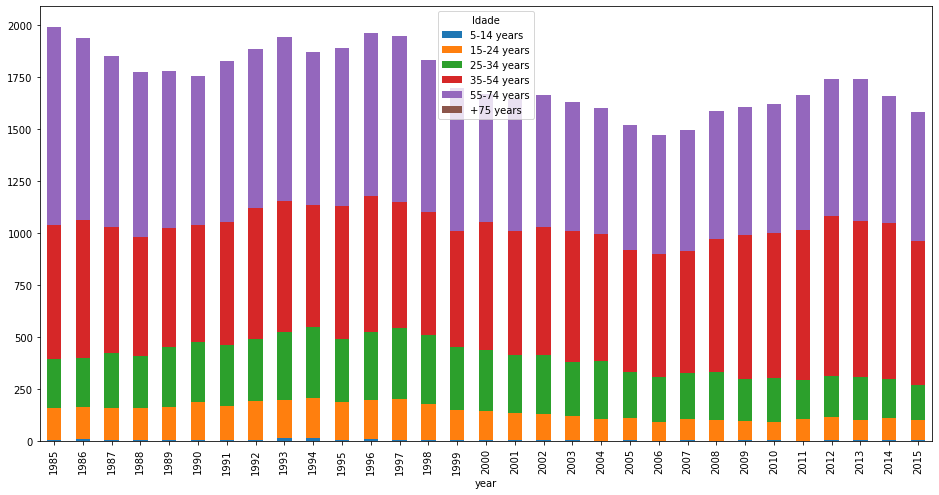

In [50]:
# Plot da pivot table das faixas etárias(Brasil)
tableItaly.plot.bar(stacked=True, figsize=(16,8))
plt.legend(title="Idade");

In [60]:
# Estatística de suicídios por faixa etária na Itália
tableItaly[["25-34 years"]].loc[2015]
tableItaly.loc[2015] / tableItaly.loc[2015].sum()

age
5-14 years     0.004110
15-24 years    0.061650
25-34 years    0.105912
35-54 years    0.437243
55-74 years    0.391084
+75 years           NaN
Name: 2015, dtype: float64

## Taxa de suicídio entre homens e mulheres

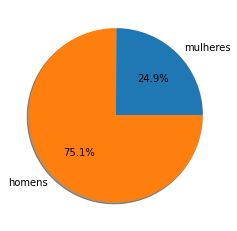

In [61]:
# Extração de valores entre homens e mulheres
men_women = df_italy.groupby("sex").suicides_no.sum() / df_italy.groupby("sex").suicides_no.sum().sum()

# Gráfio de pizza
plt.pie(men_women, labels=['mulheres', 'homens'], autopct='%1.1f%%', shadow=True);